In [1]:
# importing essential libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [3]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [7]:
model.score(X_test, y_test)

0.452606602161738

Text(0, 0.5, 'Predictions')

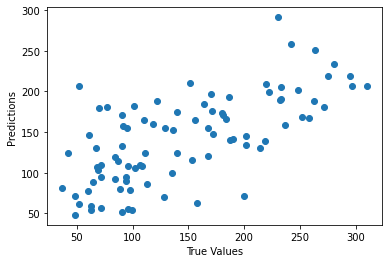

In [8]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [9]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.8532569849144
Train RMSE: 53.55881425327268


# Feature Scaling

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [11]:
y = data['Value']

In [12]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [92]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [93]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

Copy the data for implemented stuff.

### MinMaxScaler

In [95]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [96]:
min_max_train = pd.DataFrame(columns=X_train.columns, data=norm.transform(X_train))

In [98]:
min_max_train

,Age,Overall,Potential,Jersey Number
0,0.551724,0.319149,0.297872,0.051020
1,0.172414,0.234043,0.425532,0.316327
2,0.344828,0.382979,0.382979,0.142857
3,0.206897,0.127660,0.297872,0.285714
4,0.137931,0.212766,0.404255,0.010204
...,...,...,...,...
14320,0.103448,0.744681,0.957447,0.214286
14321,0.241379,0.489362,0.574468,0.102041
14322,0.379310,0.531915,0.510638,0.122449
14323,0.517241,0.489362,0.468085,0.132653


In [99]:
min_max_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

In [101]:
min_max_test

,Age,Overall,Potential,Jersey Number
0,0.310345,0.382979,0.404255,0.020408
1,0.344828,0.340426,0.361702,0.071429
2,0.310345,0.276596,0.361702,0.051020
3,0.310345,0.553191,0.617021,0.081633
4,0.137931,0.276596,0.510638,0.112245
...,...,...,...,...
3577,0.206897,0.446809,0.638298,0.122449
3578,0.172414,0.361702,0.553191,0.142857
3579,0.310345,0.319149,0.382979,0.163265
3580,0.137931,0.234043,0.531915,0.051020


#### Implement your own MinMaxScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [102]:
class MyMinMaxScaler:
    
    def __init__(self):
        # TODO
        self.x_min = None
        self.x_max = None

    def fit(self, X):
        # TODO
        self.x_min = X.min()
        self.x_max = X.max()
        
    def transform(self, X):
        # TODO
        X_transformed = (X - self.x_min) / (self.x_max - self.x_min)
        return X_transformed

In [108]:
# TODO
norm = MinMaxScaler().fit(X_train)

In [109]:
min_max_train_ = pd.DataFrame(columns=X_train.columns, data = norm.transform(X_train))

In [112]:
# the two are equal
np.any(min_max_train_ != min_max_train)

False

In [113]:
min_max_test_ = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

In [114]:
np.any(min_max_test_ != min_max_test)

False

### Standard Scaler

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [117]:
std_scaled_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

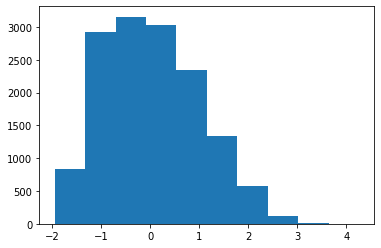

In [119]:
plt.hist(std_scaled_train.Age)
plt.show()

In [120]:
std_scaled_test = pd.DataFrame(columns=X_test.columns, data = norm.transform(X_test))

#### Implement your own StandardScaler. Make sure you get the same results as in sklearn.preprocessing.MinMaxScaler

In [91]:
class MyStandardScaler:
    
    def __init__(self):
        # TODO
        self.x_std = None
        self.x_mean = None

    def fit(self, X):
        # TODO
        self.x_std = np.std(X)
        self.x_mean = X.mean()
        
    def transform(self, X):
        # TODO
        X_transformed = (X - self.x_mean) / self.x_std
        return X_transformed

In [121]:
# TODO
std_scaled_train_ = pd.DataFrame(columns=X_test.columns, data = norm.transform(X_train))
std_scaled_test_ = pd.DataFrame(columns=X_test.columns, data = norm.transform(X_test))

In [ ]:
np.any(std_scaled_train_ != std_scaled_train), np.any(std_scaled_test_ != std_scaled_train)

# tasks

###### try applying this scalers to any dataset and check the regression results

In [ ]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [ ]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [ ]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

In [ ]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [ ]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [ ]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_train

In [ ]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

In [ ]:
data = pd.read_csv('regression.csv') 
y = data.Value
data = data.drop(['Name', 'Nationality', 'Club', 
                  'Wage', 'Position', 'Contract Valid Until', 
                  'Height', 'Weight', 'Value'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [ ]:
norm = StandardScaler().fit(X_train)

In [ ]:
X_train = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
X_test = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))
predictions = lm.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))